<a href="https://colab.research.google.com/github/tawsif5001/brain_tumor_detection_app-using-cnn/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn pillow


In [ ]:
path = '/content/drive/MyDrive/dataset'

Found 1049 images belonging to 4 classes.
Found 262 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 991s 27s/step - accuracy: 0.4114 - loss: 1.7308 - val_accuracy: 0.4198 - val_loss: 1.4031
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 873s 26s/step - accuracy: 0.6771 - loss: 0.9410 - val_accuracy: 0.6603 - val_loss: 1.0004
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 960s 28s/step - accuracy: 0.7219 - loss: 0.7842 - val_accuracy: 0.6832 - val_loss: 0.8945
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 880s 26s/step - accuracy: 0.7395 - loss: 0.7409 - val_accuracy: 0.6908 - val_loss: 0.7858
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 944s 27s/step - accuracy: 0.7535 - loss: 0.6918 - val_accuracy: 0.6947 - val_loss: 0.7786
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 899s 26s/step - accuracy: 0.7819 - loss: 0.6082 - val_accuracy: 0.6908 - val_loss: 0.7996
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 918s 26s/step - accuracy: 0.7594 - loss: 0.7113 - val_accuracy: 0.6985 - val_loss: 0.7946
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 865s 26s/step - accuracy: 0.8003 - loss: 0.5444 - val_accuracy: 0.6641 - val_

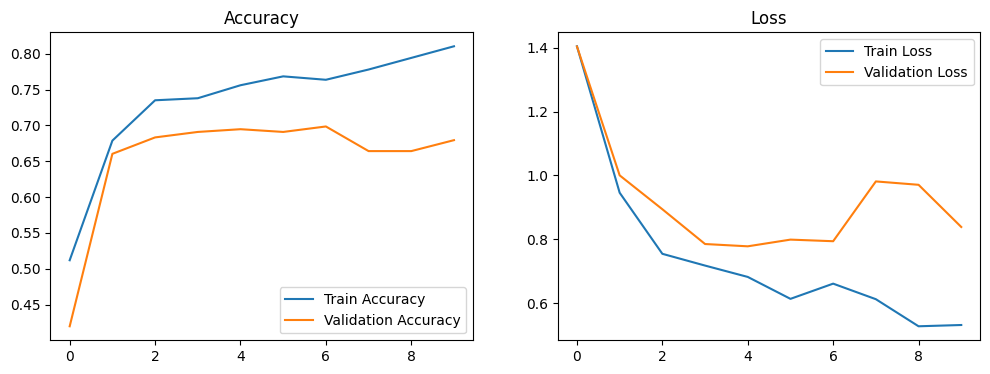

9/9 ━━━━━━━━━━━━━━━━━━━━ 171s 18s/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.20      0.27      0.23        60
  meningioma       0.23      0.23      0.23        61
     notumor       0.34      0.23      0.28        81
   pituitary       0.28      0.30      0.29        60

    accuracy                           0.26       262
   macro avg       0.26      0.26      0.26       262
weighted avg       0.27      0.26      0.26       262



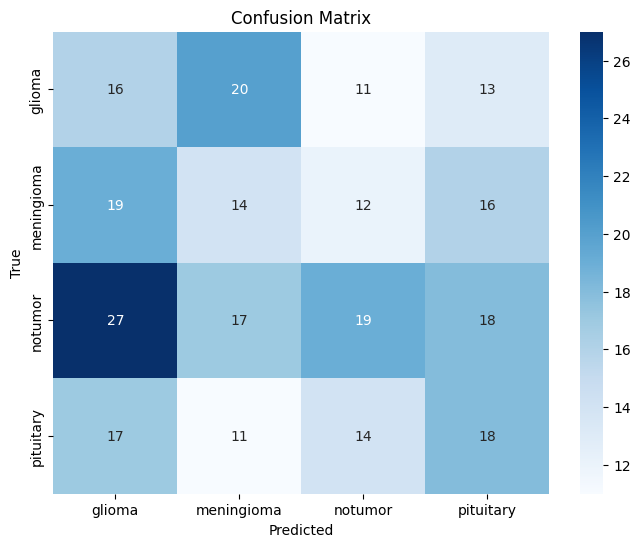

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Set up paths and parameters
dataset_path = '/content/drive/MyDrive/dataset'  # Path to your dataset
img_size = (224, 224)
batch_size = 32
num_classes = 4
epochs = 20

# Step 2: Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Step 3: Load VGG16 model with pre-trained weights
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all VGG16 layers to retain the pre-trained weights
for layer in vgg16.layers:
    layer.trainable = False

# Step 4: Build the model using VGG16 as a base
model = Sequential([
    vgg16,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for 4 classes
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Step 6: Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Step 7: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Step 8: Classification Report and Confusion Matrix
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Function to predict new MRI images
def predict_image(img_path):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    return class_names[np.argmax(prediction)], np.max(prediction)



In [ ]:
img_path = '/content/Te-no_0216.jpg'
predicted_class, confidence = predict_image(img_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: notumor, Confidence: 0.99
